## Targeted Marketing


The data is inspired from Kaggle `"Uplift Modeling, Marketing and Campaign Data"` provided by AI lab of Criteo (The Criteo AI Lab is pioneering innovations in computational advertising it operates within the spectrum of two main areas: ML Engineering and ML Research) The dataset has 13M rows, each row gives information about 12 features of a user, 4 binary labels (1, 0) visits, conversions, treatment, exposure.


### Importing core libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random

### Loading datasets

Link to dataset [Targeted Marketing](https://www.kaggle.com/datasets/aminghias/targeted-marketing)

In [3]:
df = pd.read_csv('./df_classes.csv')

In [4]:
df.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'treatment', 'conversion', 'visit', 'exposure', 'class'],
      dtype='object')

In [5]:
df.shape

(13979592, 17)

The data has over `13 million` rows, which is more than my PC can handle. I'll reduce it down to `10,000`

In [6]:
sub_ind = random.sample(list(df.index), 10000)

In [7]:
df_small = df.iloc[sub_ind]

In [8]:
df_small.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
5815506,21.301181,10.059654,9.018052,4.679882,10.280525,4.115453,-12.915828,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
12514623,23.685638,10.059654,8.871956,4.679882,10.280525,4.115453,-3.993764,4.833815,3.943716,13.190056,5.300375,-0.168679,0,0,0,0,Lost Cause
3184520,24.000460,10.059654,8.214383,4.679882,10.280525,4.115453,-9.864621,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
8899126,22.827105,10.059654,8.983373,4.679882,10.280525,4.115453,-6.359690,4.833815,3.934656,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
7293552,13.792846,10.059654,8.214383,2.039645,10.280525,4.115453,-5.116672,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause


In [9]:
df_small.reset_index(inplace=True)

### Scanning for null values

In [10]:
df_small.isna().sum()

index         0
f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
class         0
dtype: int64

In [11]:
# Distribution of customer classes from subset
df_small['class'].value_counts()

Lost Cause      9469
Persuadables     326
Dont Disturb     105
Sure Thing       100
Name: class, dtype: int64

In [12]:
# Distribution of customer classes from source data
df['class'].value_counts()

Lost Cause      13252906
Persuadables      440543
Dont Disturb      149862
Sure Thing        136281
Name: class, dtype: int64

The distribution of the data seems to be similar

In [13]:
df_small.head()

,index,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,5815506,21.301181,10.059654,9.018052,4.679882,10.280525,4.115453,-12.915828,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
1,12514623,23.685638,10.059654,8.871956,4.679882,10.280525,4.115453,-3.993764,4.833815,3.943716,13.190056,5.300375,-0.168679,0,0,0,0,Lost Cause
2,3184520,24.000460,10.059654,8.214383,4.679882,10.280525,4.115453,-9.864621,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
3,8899126,22.827105,10.059654,8.983373,4.679882,10.280525,4.115453,-6.359690,4.833815,3.934656,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
4,7293552,13.792846,10.059654,8.214383,2.039645,10.280525,4.115453,-5.116672,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause


In [14]:
df_small.drop('index', axis=1, inplace=True)

C:\Users\Dell 5480\AppData\Local\Temp\ipykernel_12136\3756180643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small.drop('index', axis=1, inplace=True)


The features of the dataset have values with varying range. It's best I scale them

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
mms = MinMaxScaler()

In [17]:
targ_cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11']

In [18]:
df_small[targ_cols] = mms.fit_transform(df_small[targ_cols])

C:\Users\Dell 5480\AppData\Local\Temp\ipykernel_12136\4094281010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small[targ_cols] = mms.fit_transform(df_small[targ_cols])


In [19]:
df_small.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,0.614704,0.0,0.959572,1.000000,0.0,1.0,0.462075,0.0,0.945451,0.0,0.0,1.0,1,0,0,0,Lost Cause
1,0.783474,0.0,0.785135,1.000000,0.0,1.0,0.825383,0.0,0.906748,0.0,0.0,1.0,0,0,0,0,Lost Cause
2,0.805757,0.0,0.000000,1.000000,0.0,1.0,0.586321,0.0,1.000000,0.0,0.0,1.0,1,0,0,0,Lost Cause
3,0.722708,0.0,0.918165,1.000000,0.0,1.0,0.729042,0.0,0.876728,0.0,0.0,1.0,1,0,0,0,Lost Cause
4,0.083270,0.0,0.000000,0.743299,0.0,1.0,0.779658,0.0,1.000000,0.0,0.0,1.0,1,0,0,0,Lost Cause


The goal of this notebook is to predict class of a person using the features provided in the dataset

In [20]:
df_small['class'].unique()

array(['Lost Cause', 'Persuadables', 'Sure Thing', 'Dont Disturb'],
      dtype=object)

I will use the LabelEncoder to encode these values

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
df_small['class'] = le.fit_transform(df_small['class'])

C:\Users\Dell 5480\AppData\Local\Temp\ipykernel_12136\2260084954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['class'] = le.fit_transform(df_small['class'])


In [24]:
pd.DataFrame.from_records(list(zip(le.classes_,list(range(len(le.classes_))))), columns=['Label', 'Encoded Value'])

,Label,Encoded Value
0,Dont Disturb,0
1,Lost Cause,1
2,Persuadables,2
3,Sure Thing,3


### Spliting into training and testing samples

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df_small.drop('class',axis=1)
y = df_small['class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Building

The goal of creating this notebook is test my understanding of Artificial Neural Network. That being said, ANN is my first choice of model for this not book

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [29]:
model = Sequential(
    [
        Dense(units=16, input_shape=(16,), activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=4, activation='softmax')
    ]
)

In [30]:
# After creating our model, it has to be compiled before it can be used
model.compile(optimizer=Adam(learning_rate=0.0001), loss=sparse_categorical_crossentropy,metrics=['accuracy'])

In [31]:
model.fit(x=X_train,y=y_train,batch_size=10, epochs=20,verbose=2)

Epoch 1/20
700/700 - 2s - loss: 0.4593 - accuracy: 0.9164 - 2s/epoch - 3ms/step
Epoch 2/20
700/700 - 1s - loss: 0.1870 - accuracy: 0.9471 - 1s/epoch - 2ms/step
Epoch 3/20
700/700 - 1s - loss: 0.1226 - accuracy: 0.9514 - 1s/epoch - 2ms/step
Epoch 4/20
700/700 - 1s - loss: 0.0821 - accuracy: 0.9743 - 1s/epoch - 2ms/step
Epoch 5/20
700/700 - 1s - loss: 0.0664 - accuracy: 0.9797 - 1s/epoch - 2ms/step
Epoch 6/20
700/700 - 1s - loss: 0.0593 - accuracy: 0.9800 - 1s/epoch - 2ms/step
Epoch 7/20
700/700 - 1s - loss: 0.0549 - accuracy: 0.9801 - 1s/epoch - 2ms/step
Epoch 8/20
700/700 - 1s - loss: 0.0516 - accuracy: 0.9803 - 1s/epoch - 2ms/step
Epoch 9/20
700/700 - 1s - loss: 0.0487 - accuracy: 0.9804 - 1s/epoch - 2ms/step
Epoch 10/20
700/700 - 1s - loss: 0.0458 - accuracy: 0.9807 - 1s/epoch - 2ms/step
Epoch 11/20
700/700 - 1s - loss: 0.0429 - accuracy: 0.9817 - 1s/epoch - 2ms/step
Epoch 12/20
700/700 - 1s - loss: 0.0404 - accuracy: 0.9820 - 1s/epoch - 2ms/step
Epoch 13/20
700/700 - 1s - loss: 0.03

### Testing model on a test set

In [32]:
pred = model.predict(x=X_test)

94/94 [==============================] - 0s 1ms/step


In [33]:
pred

array([[1.2344176e-04, 9.9987257e-01, 4.0276227e-06, 2.6049557e-10],
       [1.3656191e-04, 9.9986041e-01, 2.9689452e-06, 3.3669606e-10],
       [8.2577162e-06, 9.9999177e-01, 9.3057528e-10, 2.5734686e-15],
       ...,
       [8.5660031e-06, 9.9999142e-01, 1.0040577e-09, 2.8998806e-15],
       [3.5084074e-03, 9.9640876e-01, 8.2649698e-05, 6.6258274e-08],
       [1.0349181e-04, 9.9989569e-01, 7.8950757e-07, 2.2812587e-10]],
      dtype=float32)

I'm only intrested in the index of the value with highest probability

In [34]:
pred = np.argmax(pred, axis=1)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
import itertools

In [37]:
# Function to plot confusion matrix. Copied from sklearn website
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[  23   11    3    0]
 [   0 2838    1    0]
 [   0    0   90    4]
 [   0    0   12   18]]


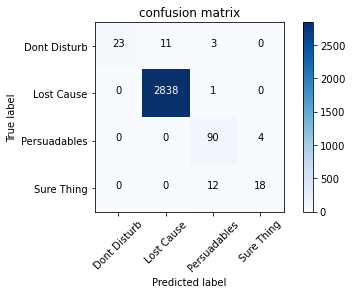

In [38]:
plot_confusion_matrix(confusion_matrix(y_test,pred),le.classes_)

In [39]:
accuracy_score(y_test,pred)

0.9896666666666667

## Comparing outcome with some other models

In [45]:
def modellers(model,X=X,y=y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test,pred)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [43]:
lgmod = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

In [46]:
modellers(lgmod)

C:\Users\Dell 5480\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9913333333333333

In [47]:
modellers(rfc)

0.9973333333333333

In [48]:
modellers(svc)

0.99